<a href="https://colab.research.google.com/github/bsgreenb/math-tools/blob/master/Geometry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primitive Notions

Points ($ A $), Lines ($ \overleftrightarrow{AB} $), Line Segments ($ \overline{\rm AB} $), Rays ($ \overrightarrow{AB} $).  Lines can be parallel ($ A \parallel B $)

The notation for line-length is just the points like $ AB $ , to distinguish it from line segment itself.. 


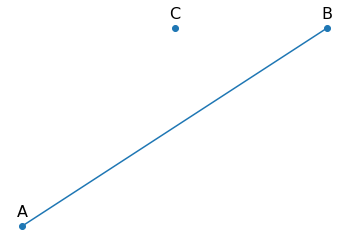

In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np


try:
  import google.colab
  import sys
  from os import path
  # We are in colab

  if not path.isdir('math-tools'):
    !git clone https://github.com/bsgreenb/math-tools.git
    sys.path.append('math-tools')
except:
  pass

from geometry import plot_line
from annotation import label
from angles import AngleAnnotation

#TODO: add a plotted line here

plt.plot([1, 2], [3, 4], marker = 'o')  
plt.plot([1.5], [4], marker='o', color='C0')
plt.axis('off')
label(plt, 'A',(1,3))
label(plt, 'B',(2,4))
label(plt, 'C',(1.5,4))

plt.show()

# Axioms

There are lots of these, just going to note the ones I use in later proofs

## Corresponding Angles Axiom

If a transversal ($ n $) intersects two parallel lines ($ l \parallel m $), then each pair of corresponding angles are congruent ($ \angle 1 \cong \angle 2 $).

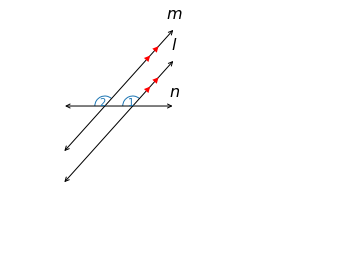

In [2]:
from angles import AngleAnnotation
from geometry import plot_parallel

fig, ax = plt.subplots()

p1 = (1,2)
p2 = (3,6)
plot_parallel(ax, p1, (2.6, 5.2), (2.75, 5.5), "red")
plot_line(ax, p1, p2, r"$ l $")
p3 = (1,3)
p4 = (3,7)
plot_line(ax, p3, p4, r"$ m $")
plot_parallel(ax, p3, (2.6, 6.2), (2.75, 6.5), "red")
# t points are for the transversal straight line
t1 = (1, 4.5)
t2 = (3, 4.5)
plot_line(ax, t1, t2, r"$ n $")

# This meets with l at x = 2.25 and m and x = 1.75.  both ys are 4.5 obvi
first_angle_location = (2.25, 4.5)
second_angle_location = (1.75, 4.5)

angle_1 = AngleAnnotation(first_angle_location, p2, t1, ax=ax, size=20, text=r"$1$", text_kw={"color": "C0"}, color="C0")
angle_2 = AngleAnnotation(second_angle_location, p4, t1, ax=ax, size=20, text=r"$2$", text_kw={"color": "C0"}, color="C0")

plt.xlim(0, 6)
plt.ylim(0, 7)
plt.axis('off')
plt.show()



Converse is also true: if a transversal through two lines creates a pair of corresponding angle, then the lines are parallel.

# Pythagorean Theorem Proof

Two major approaches to proving it, area based by constructing a composite polygon, or slicing/similarity based and solving from ratios.

Let's just show the easiest one to remember, Garfield's proof using a composite trapezoid.

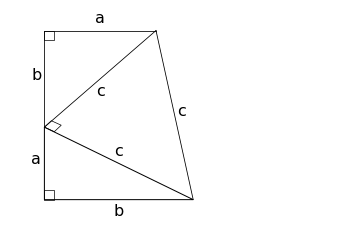

In [3]:
from matplotlib.patches import Polygon

# 3/4/5 is the smallest pythagorean triple
side_a_length = 3
side_b_length = 4
hypotenuse = 5

fig, ax = plt.subplots()

triangle1 = Polygon([(0,0), (0, side_a_length), (side_b_length, 0)], ec="black", fc=[0,0,0,0])
# Label the triangle lines at the midpoints with appropriate offsets.
offset = 8
label(ax, "a", (0, side_a_length / 2), (-offset, 0))
label(ax, "b", (side_b_length / 2, 0), (0, -2 * offset))
label(ax, "c", (side_b_length / 2, side_a_length / 2), (0, offset))
ax.add_patch(triangle1)

label(ax, "b", (0, (side_a_length +side_a_length + side_b_length) /2), (-offset, 0))
label(ax, "a", (side_a_length / 2, side_a_length + side_b_length), (0, offset))
label(ax, "c", (side_a_length / 2, (side_a_length +side_a_length + side_b_length) /2), (0, -2 * offset))
label(ax, "c", (side_b_length, (side_a_length + side_b_length) /2), (-1.5 * offset, 0))

# Add lines to form other triangles.
line_width = .8
ax.plot([0, 0], [side_a_length, side_a_length + side_b_length], color="black", lw=line_width)

ax.plot([0,side_a_length], [side_a_length + side_b_length, side_a_length + side_b_length], color="black", lw=line_width)

ax.plot([side_a_length, 0], [side_a_length + side_b_length, side_a_length], color="black", lw=line_width)
ax.plot([side_a_length, side_b_length], [side_a_length + side_b_length, 0], color="black", lw=line_width)

# Right Triangles
right1 = matplotlib.patches.Rectangle((0,0),0.25,0.4, fc=[0,0,0,0], ec="black", zorder=0, lw=.7)
ax.add_patch(right1)
right2 = matplotlib.patches.Rectangle((0,side_a_length + side_b_length),0.4,0.25, fc=[0,0,0,0], ec="black", zorder=0, lw=.7, angle=-90)
ax.add_patch(right2)
right3 = matplotlib.patches.Rectangle((0, side_a_length), 0.325, 0.325, fc=[0,0,0,0], ec="black", zorder=0, lw=.7, angle=-35)
ax.add_patch(right3)

plt.ylim(-1,8)
plt.xlim(-1,8)

plt.axis('off')
plt.show()



$$
\begin{align}
& \text{Area of a Trapezoid} = \frac{a + b}{2}(a + b) \\
& \frac{a + b}{2}(a + b) = \frac{ab}{2} + \frac{ba}{2} + \frac{c^2}{2} \\
& (a + b)(a + b) = ab + ba + c^2 \\
& a^2 + b^2 + 2ab = ab + ba + c^2 \\
& a^2 + b^2 = c^2 \\
\end{align}
$$

# Rigid Transformations

Congruence and Similarity are proven through transformations.

Rigid Transformations (only type allowed for Congruence):

- Translation
- Rotation
- Reflection

Non-Rigid (but preserve Similarity):

- Dilation

# Congruence of Triangles

The gist of the proofs for these is rigid transformations combining translation, rotation, and if necessary reflection.  Angles tell you that rays are carried over.  Matching side lengths tell you the circle that is formed from one point to another.  Combine these to find intersections.

Note that in the beginning of the proofs you'll match one line to another, but there are two sides where the rest of the triangle could be.  If it's on the opposite side, which you have to account for, you'd need a reflection.

- SSS
- SAS 
- ASA = AAS (because you get a third angle for free)

[link khan academy proofs of these]

SSA (or better yet, ASS) is not congruent though.. unless the Angle is right or obtuse.  Easy to remember ASS postulate is ass..  

# Angle Bisector theorem

Basically you get similar triangles from an angle bisector.  It's proven by adding lines to form a diamond of parallel paired lines and using triangle stuff like above to prove similarity https://youtu.be/TpIBLnRAslI

# Dividing Line Segments

Midpoint formula is obvious.  The x and y coordinates are averaged.  If you want a portion of a line (like a 25% of the length point) just do a weighted average, where you add proportionate weight multiples.

# Perpindicular Lines

Perpindicular line slopes are negative reciprocals of each other.

Nice proof from Khan which basically finds their slopes in terms of two (similar thanks to 90degrees on both) triangles, uses that to prove the inverse negative thing.

https://youtu.be/HyThzLRuqXo

# Standard Equation of a Circle

It's basically just solving for the pythagorean theorem, where the two sides are the distance of x and y from the center ($ h $ and $ k $ by convention) squared, and the radius is the hypotenuse squared.  Let's demonstrate this with matplot.

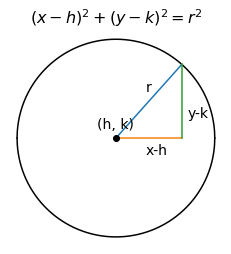

In [15]:
# 1. Plot Circle
# https://stackoverflow.com/a/44050984/378622 

r = 6
x = np.linspace(-r,r,1000)
# Solving for y from the standard circle equation which gives a plus/minus..
y = np.sqrt(-x**2+r**2)
plt.plot(x, y, "black")
plt.plot(x, -y, "black")

# 2 plot a radius

circle_y = np.sqrt(-4**2+r**2)

plt.plot((0,4), (0, circle_y))
label(plt, "r", (4 / 2, circle_y / 2), fontsize=14)

plt.plot((0,4), (0,0))
label(plt, "x-h", (4 / 2, 0), (8, -16), fontsize=14)

plt.plot((4,4), (0, circle_y))
label(plt, "y-k", (4, circle_y / 2), (16, -16), fontsize=14)

plt.plot((0), (0), marker='o', color="black")
label(plt, "(h, k)", (0,0), fontsize=14)

plt.gca().set_aspect('equal')
plt.axis('off')

plt.title(r"$(x-h)^2 + (y-k)^2 = r^2$", fontsize=16)
plt.show()

# Conic Sections

The intersection between a plane and a cone.  Includes:

- Circle
- Ellipse 
- Parabola
- Hyperbola

https://youtu.be/0A7RR0oy2ho

# Parabolas

One definition of a parabola is that it's the set of points which are equidistant from a Focus (a point) and a Directrix (Line).

Equations for a parabola:

$$ y = a(x-h)^2 + k $$
$$ x = a(y-k)^2 + h $$

Where $ (h, k) $ is the vertex of the parabola.

# Circle terminology

* **Secant** lines go through a circle.
* **Chords** are line segments across a circle
* **Arcs** are parts of the circle perimeter.  **Arc Measure** is the central angle creating that arc.  **Arc Length** is the length of the perimeter segment, which will vary as a function of Arc Measure and the circle radius/size.
* **Central Angle** Angle going from radius to an arc.
* **Inscribed Angle** is "the angle formed in the interior of a circle when two chords intersect on the circle. It can also be defined as the angle subtended at a point on the circle by two given points on the circle."

Measure of an arc / central angle equivalent values.

## Inscribed angle theorem

An inscribed angle will be half the central angle going to the same arc.  This applies regardless of where the center lies relative to the inscribed angle, see proof: https://youtu.be/MyzGVbCHh5M

With this theorem you can also take advantage of the fact that two different inscribed angles with the same arc are equivalent.  You get not just the relationship between the central angle and the arc but also between other arcs.  Also, don't forget that the arcs need to add up to either $ 360 \circ $ or $ 2 \pi $ radians.

# Common Areas, Volumes, Surface Areas, Perimeters

## 2D
| Shape                | Perimeter   | Area            |
|----------------------|-------------|-----------------|
| Triangle             | $a+b+c$     | $\frac{1}{2}bh$ |
| Rhombus (p,q=diag)   | $4a$        | $\frac{pq}{2}$  |
| Trapezoid (a,b=base) | $a+b+c+d$   | $\frac{a+b}{h}$ |


## 3D

| Shape          | Volume                     | Surface Area                           |
|----------------|----------------------------|----------------------------------------|
| Cube (a=edge)  | $a^3$                      | $3a^2$                                 |
| Sphere         | $\frac{4}{3}\pi r^3$       | $4\pi r^2$                             |
| Cone           | $\pi r^2 \frac{h}{3}$      | $\pi r(r + \sqrt{h^2 + r^2})$          |
| Cylinder       | $\pi r^2 h$                | $2\pi rh + 2\pi r^2$                   |
| Square Pyramid | $\frac{1}{3}s^2 h$         | $a^2 + 2a \sqrt{\frac{a^2}{4} + h^2} $ |


